In [1]:
from sim_core.engine import Engine

def ms_to_kph(speed_ms):
    return 3.6 * speed_ms

def torque_output(rpm):
    a = -0.00017 / 10
    b = 15 / 100
    c = 20000 / 100
    return max(0, a * rpm * rpm + b * rpm + c)

engine = Engine(
    ratio_gears=[3.5, 2.8, 2.1, 1.7, 1.3, 1],
    ratio_differential=4,
    torque_output = torque_output,
    max_rpm=10000,
    min_rpm=500,
    idle_rpm=2000
)

In [2]:
class Car:
    def __init__(self, mass, radius_wheel, engine):
        self.mass = mass
        self.radius_wheel = radius_wheel
        self.engine = engine
        self.reset()

    def reset(self):
        self.speed = 0
        self.engine.reset()

    def accelerate(self, delta_t):
        force_engine = self.engine.force_wheel(self.radius_wheel)
        acceleration = force_engine / self.mass
        self.speed += acceleration * delta_t
        self.engine.update_rpm(self.radius_wheel, self.speed)

In [3]:
car = Car(
    mass=700,
    radius_wheel=0.3,
    engine=engine
)

In [118]:
print(f'RPM : {car.engine._rpm}, speed : {car.speed} kph')

car.accelerate(0.1)

print(f'RPM : {car.engine._rpm}, speed : {car.speed} kph')


RPM : 10000, speed : 22.438917845000027 kph
RPM : 10000, speed : 22.438917845000027 kph


Text(0, 0.5, 'Torque (Nm)')

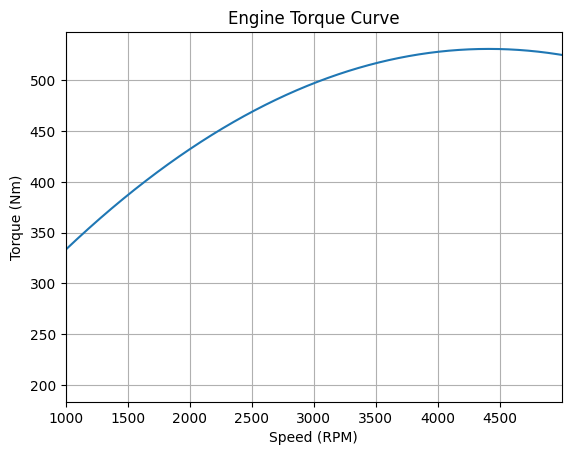

In [ ]:
import numpy as np

rpms = np.arange(0, 5000)
torque = [engine.torque_output(rpm) for rpm in rpms]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(torque)
ax.grid()
ax.set_xlim([1000, np.max(rpms)])
ax.set_title('Engine Torque Curve')
ax.set_xlabel('Speed (RPM)')
ax.set_ylabel('Torque (Nm)')